In [1]:
import numpy as np
import sqlite3
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import numbers

In [2]:
# Grab a simulation: http://astro-lsst-01.astro.washington.edu:8081/fbs_db/baseline/baseline_v1.5_10yrs.db
conn = sqlite3.connect('var_expt_v1.5_10yrs.db')
# Just read the whole thing into pandas
df = pd.read_sql('select * from summaryallprops;', conn)

In [3]:
# Handy function from lsst.sims.utils
def _angularSeparation(long1, lat1, long2, lat2):
    """
    Angular separation between two points in radians

    Parameters
    ----------
    long1 is the first longitudinal coordinate in radians

    lat1 is the first latitudinal coordinate in radians

    long2 is the second longitudinal coordinate in radians

    lat2 is the second latitudinal coordinate in radians

    Returns
    -------
    The angular separation between the two points in radians

    Calculated based on the haversine formula
    From http://en.wikipedia.org/wiki/Haversine_formula
    """

    t1 = np.sin(lat2/2.0 - lat1/2.0)**2
    t2 = np.cos(lat1)*np.cos(lat2)*np.sin(long2/2.0 - long1/2.0)**2
    _sum = t1 + t2

    if isinstance(_sum, numbers.Number):
        if _sum<0.0:
            _sum = 0.0
    else:
        _sum = np.where(_sum<0.0, 0.0, _sum)

    return 2.0*np.arcsin(np.sqrt(_sum))

In [4]:
# Point we want to evaluate at. Here's a spot in the WFD
ra = 0.  # Degrees
dec = -10.  # Degrees

# You could also try pointing at a DDF! Here's ELAIS S1
#ra =  9.45
#dec = -44.

# Or look in the NES
#ra = 60.
#dec = 30.

# only look for observations where the field center is within 1.75 degrees of our target point
d_limit = 1.75 # Degrees


distances = _angularSeparation(np.radians(ra), np.radians(dec),
                               np.radians(df['fieldRA']), np.radians(df['fieldDec']))
# This is not a particularly computationally efficient way to find the overlapping
# observations, MAF uses a KD tree, but it should be fine for working on a single 
# example point
in_fov = np.where(distances <= np.radians(d_limit))[0]

In [5]:
# How many observations did we get that overlap there?
in_fov.size

872

In [6]:
# Make a dataframe that is just observations overlapping our target point
relevant_df = df.iloc[in_fov]

In [7]:
relevant_df

,observationId,fieldRA,fieldDec,observationStartMJD,flush_by_mjd,visitExposureTime,filter,rotSkyPos,numExposures,airmass,...,rotTelPos,moonAz,sunAz,sunRA,sunDec,moonRA,moonDec,moonDistance,solarElong,moonPhase
2746,2746,0.283407,-8.921317,59857.158960,59857.186332,20.0,y,119.290644,1,1.073487,...,60.493244,269.280004,197.985153,3.327460,-0.079935,313.364836,-22.477440,46.937109,162.997532,65.476778
2781,2781,0.283407,-8.921317,59857.169603,59857.186332,20.0,y,119.290644,1,1.075804,...,51.467598,267.507597,191.789679,3.327629,-0.080007,313.483116,-22.419697,46.820081,162.988412,65.538746
2860,2860,0.283407,-8.921317,59857.195106,59857.230434,20.0,y,84.381742,1,1.099865,...,67.476560,263.697738,175.791228,3.328033,-0.080178,313.778598,-22.277477,46.527826,162.966553,65.693913
2895,2895,0.283407,-8.921317,59857.205908,59857.230434,20.0,y,84.381742,1,1.118454,...,61.207031,262.163423,169.192123,3.328205,-0.080251,313.909422,-22.215917,46.398554,162.957291,65.762689
3722,3722,1.302584,-10.162186,59858.220779,59858.244287,26.0,z,205.016509,1,1.142787,...,292.135064,271.323145,160.613871,3.344329,-0.087060,328.575907,-17.573120,32.574953,161.695396,73.279702
3757,3757,1.302584,-10.162186,59858.235630,59858.244287,26.0,y,205.016509,1,1.188571,...,286.875979,268.830569,152.404831,3.344565,-0.087160,328.738777,-17.476501,32.406805,161.683111,73.372276
8711,8711,359.419635,-8.454132,59865.193348,59865.221327,20.0,z,218.541791,1,1.148853,...,281.956049,38.679440,176.263381,3.455947,-0.133236,57.401153,22.137307,64.508823,155.460805,77.459884
8746,8746,359.419635,-8.454132,59865.205198,59865.221327,20.0,y,218.541791,1,1.183282,...,277.312643,35.035209,169.519451,3.456138,-0.133313,57.501993,22.194911,64.616888,155.449678,77.408068
9744,9744,358.806251,-10.823016,59866.199597,59866.234230,27.0,i,181.804587,1,1.159102,...,311.665389,44.232906,172.638541,3.472195,-0.139792,70.616268,25.359351,78.659052,152.500866,71.067767
9779,9779,358.806251,-10.823016,59866.213619,59866.234230,27.0,z,181.804587,1,1.207795,...,307.406949,40.578256,164.950672,3.472422,-0.139883,70.747771,25.416732,78.789725,152.487890,71.004927


In [8]:
# Here are all the columns that are available. These are documented at:  
# https://github.com/lsst/sims_featureScheduler/blob/master/README.md
relevant_df.columns

Index(['observationId', 'fieldRA', 'fieldDec', 'observationStartMJD',
       'flush_by_mjd', 'visitExposureTime', 'filter', 'rotSkyPos',
       'numExposures', 'airmass', 'seeingFwhm500', 'seeingFwhmEff',
       'seeingFwhmGeom', 'skyBrightness', 'night', 'slewTime', 'visitTime',
       'slewDistance', 'fiveSigmaDepth', 'altitude', 'azimuth', 'paraAngle',
       'cloud', 'moonAlt', 'sunAlt', 'note', 'fieldId', 'proposalId',
       'block_id', 'observationStartLST', 'rotTelPos', 'moonAz', 'sunAz',
       'sunRA', 'sunDec', 'moonRA', 'moonDec', 'moonDistance', 'solarElong',
       'moonPhase'],
      dtype='object')

In [9]:
# we actually just use numpy structured arrays in MAF, so let's convert to that
# There really should be a faster and prettier way to do this, so lmk if you
# know how. 
int_cols = ['observationId', 'night']
str_cols = ['note', 'filter']
dtype = []
for colname in relevant_df.columns:
    if colname in str_cols:
        dtype.append((colname, '|U1'))
    elif colname in int_cols:
        dtype.append((colname, int))
    else:
        dtype.append((colname, float))

In [10]:
dataSlice = np.zeros(relevant_df['observationId'].values.size, dtype=dtype)
for key in relevant_df.columns:
    dataSlice[key] = relevant_df[key].values

Now, MAF will do all that selecting down automatically, and can add additional constriants like filter="r" and can loop over many point in the sky in a grid or user defined points

But the point for this notebook is all you have to do is write a function that takes the dataSlice numpy array we made, and returns a measure of how well you can do your science. 

MAF also has some sky maps so you can have access to information about that point in the sky, for example, the dust extinction or the density of stars. If you're running over a grid of HEALpixels, MAF will pass along the nside so you can assume an area if you like.

Text(0.5, 1.0, 'Observations at ra=0.000, dec=-10.000')

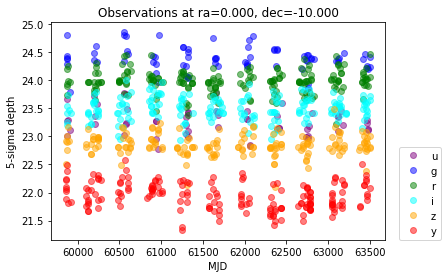

In [11]:
# let's make a plot
f2c = {'u': 'purple', 'g': 'blue', 'r': 'green',
       'i': 'cyan', 'z': 'orange', 'y': 'red'}
for fn in f2c:
    in_filt = np.where(dataSlice['filter'] == fn)[0]
    plt.plot(dataSlice['observationStartMJD'][in_filt],
             dataSlice['fiveSigmaDepth'][in_filt], 'o',
            color=f2c[fn], label=fn, alpha=0.5)
plt.xlabel('MJD')
plt.ylabel('5-sigma depth')
plt.legend(loc=(1.04,0))
plt.title('Observations at ra=%.3f, dec=%.3f' % (ra,dec))

In [19]:
for fn in f2c:
    in_filt = np.where(dataSlice['filter'] == fn)[0]
    print(fn, np.std(dataSlice['fiveSigmaDepth'][in_filt]))

u 0.23371654145769324
g 0.21218600831510126
r 0.19461046756097636
i 0.2008860950138036
z 0.18375913047758918
y 0.23476864150672863


In [12]:
# Here's an example function that takes the relevant dataframe and computes something
# Note:  This example does not use the fiveSigmaDepth column, so it's probably not going to 
# be very scientifically useful. 
def n_seasons(dataSlice, npoints=80, time_gap=40, slicePoint=None):
    """Return how many seasons have over npoints visits
    """
    # Not guarenteed to be sorted
    order = np.argsort(dataSlice['observationStartMJD'])
    dataSlice = dataSlice[order]
    # time between observations
    diff = dataSlice['observationStartMJD'][1:] - dataSlice['observationStartMJD'][0:-1]
    # Where are there big gaps that we are going to call season breaks
    big_gaps = np.where(diff >= time_gap)[0]
    obs_in_seasons = big_gaps[1:] - big_gaps[0:-1]
    result = np.where(obs_in_seasons >= npoints)[0].size
    # Check if there are enough points in the last season
    if dataSlice['observationStartMJD'].size - big_gaps[-1] >= npoints:
        result += 1
    return result


In [13]:
n_seasons(dataSlice)

8

In [14]:
# ok, let's bump it up and make a simple light curve for an object, 
# and then we'll write a metric to see if it would be detected

def simple_lc(mjd, mjd0, filtername):
    duration = 10. # we'll say it's 10 days
    result = mjd * 0 + np.inf # mag is infinate eveyrwhere by default
    #let's say this is a top-hat that only shows up in g and r
    g_on = np.where((mjd > mjd0) & (mjd < (mjd0+duration)) & (filtername=='g'))[0]
    result[g_on] = 22.
    r_on = np.where((mjd > mjd0) & (mjd < (mjd0+duration)) & (filtername=='r'))[0]
    result[r_on] = 23.8
    
    return result

In [15]:

def lc_detected(dataSlice, slicePoint=None):
    result = 0
    lc = simple_lc(dataSlice['observationStartMJD'],
                   slicePoint['mjd0'], dataSlice['filter'])
    detected = np.where(lc < dataSlice['fiveSigmaDepth'])[0]
    if np.size(detected) > 0:
        result = 1
    return result


In [16]:
# make a light curve that goes off at a given date, see if it gets detected
slicePoint = {'mjd0': 63506}
lc_detected(dataSlice, slicePoint=slicePoint)

1

In [17]:
slicePoint = {'mjd0': 60000}
lc_detected(relevant_df, slicePoint=slicePoint)

0

There are two really good types of science metrics one can write:

1) Take some sort of fiducial object (say, a 22 mag star with a flat SED), and see how well it is measured at evey point in the sky.

2) Generate a population of objects (say, Galactic variable stars or AGN), and then set the criteria for one to be "well observed", and loop over each object to see what fraction of your objects get measured.